In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays
License(s): unknown
100% 172M/172M [00:10<00:00, 17.1MB/s]
100% 172M/172M [00:10<00:00, 17.3MB/s]


In [ ]:
!unzip /content/bone-fracture-detection-using-xrays.zip

In [4]:
def load_images_and_labels(main_folder):
    data = []
    labels = []
    classes = os.listdir(main_folder)

    for label in classes:
        class_folder = os.path.join(main_folder, label)
        if os.path.isdir(class_folder):

            for image_name in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, (224, 224))
                    data.append(image)
                    labels.append(label)
    return np.array(data), np.array(labels)

In [5]:
main_folder = '/content/archive (6)/train'
data, labels = load_images_and_labels(main_folder)

Text(0.5, 1.0, 'not fractured')

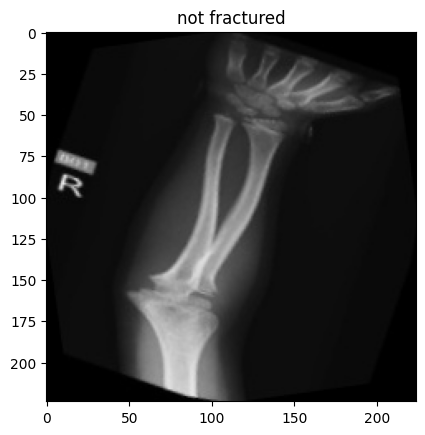

In [6]:
plt.imshow(data[0])
plt.title(labels[0])

In [7]:
labels[0]

'not fractured'

In [8]:
test, test_labels = load_images_and_labels('/content/archive (6)/val')

In [9]:
len(test)

600

In [10]:
def preprocess_images(images, image_size=(128, 128)):
    processed_images = []
    for image in images:
        image = cv2.resize(image, image_size)
        image = image.astype('float32') / 255.0
        processed_images.append(image)
    return np.array(processed_images)

In [20]:
def encode_labels(labels):
  labels_encoded = []
  for label in labels:
    if label == 'fractured':
        label = 1
    else :
        label = 0
    labels_encoded.append(label)
  return labels_encoded

In [21]:
image_size = (128, 128)
data_processed = preprocess_images(data, image_size)

In [22]:
labels_encoded =  encode_labels(labels)

In [26]:
labels_encoded = np.array(labels_encoded)
labels_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
x_train, x_val, y_train, y_val = train_test_split(data_processed, labels_encoded, test_size=0.2, random_state=42)

In [63]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.5842 - loss: 1.3942 - val_accuracy: 0.7225 - val_loss: 0.6322
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7370 - loss: 0.5040 - val_accuracy: 0.7975 - val_loss: 0.4727
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7928 - loss: 0.4043 - val_accuracy: 0.8883 - val_loss: 0.2677
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8477 - loss: 0.2989 - val_accuracy: 0.9210 - val_loss: 0.1935
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8726 - loss: 0.2394 - val_accuracy: 0.9346 - val_loss: 0.1552
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8985 - loss: 0.2017 - val_accuracy: 0.9442 - val_loss: 0.1414
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8992 - loss: 0.1923 - val_accuracy: 0.9622 - val_loss: 0.0989
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9214 - loss: 0.1597 - val_acc

In [66]:
test_data = preprocess_images(test,image_size)

In [67]:
test_labels_encoded = encode_labels(test_labels)

In [68]:
test_labels_encoded = np.array(test_labels_encoded)

In [69]:
X,Y,x,y = train_test_split(test_data,test_labels_encoded,test_size=0.2,random_state=42)

In [70]:
p = np.concatenate((X, Y), axis=0)
h = np.concatenate((x, y), axis=0)

In [71]:
model.evaluate(p,h)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7481 - loss: 1.3256


[1.360521912574768, 0.7616666555404663]

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
y_pred = model.predict(p)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [74]:
y_pred.shape

(600, 1)

In [75]:
y_pred[0]

array([0.02318575], dtype=float32)

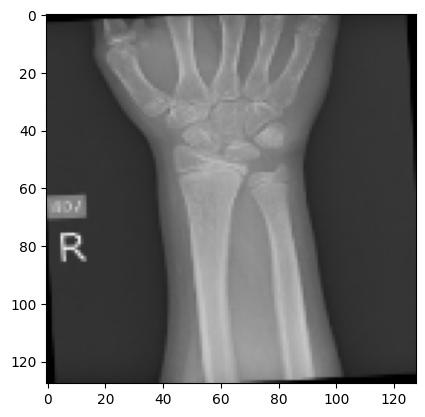

In [76]:
plt.imshow(p[0])

In [77]:
cm = confusion_matrix(np.round(y_pred),h)

In [78]:
import seaborn as sns

<Axes: >

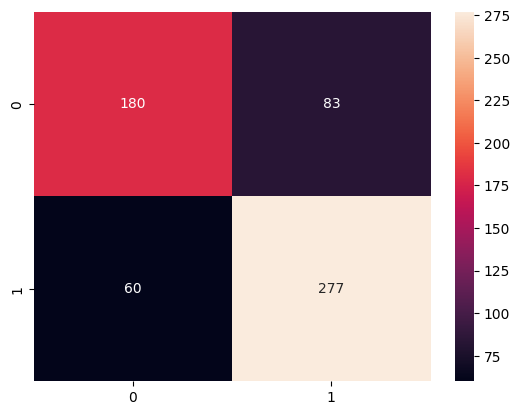

In [79]:
sns.heatmap(cm,annot=True,fmt='d')